<a href="https://colab.research.google.com/github/NahidurRahaman/Python_Note_Book/blob/main/panda_day_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
left = pd.DataFrame({"key": ["fool","fool"], "lval":[1,2]})
right = pd.DataFrame({"key": ["fool","fool"], "rval":[4,5]})
left

,key,lval
0,fool,1
1,fool,2


In [3]:
right

,key,rval
0,fool,4
1,fool,5


In [4]:
pd.merge(left, right, on="key")

,key,lval,rval
0,fool,1,4
1,fool,1,5
2,fool,2,4
3,fool,2,5


In [5]:
pd.merge(left, right, on="key", how="outer")

,key,lval,rval
0,fool,1,4
1,fool,1,5
2,fool,2,4
3,fool,2,5


In [6]:
pd.merge(left, right)

,key,lval,rval
0,fool,1,4
1,fool,1,5
2,fool,2,4
3,fool,2,5


In [7]:
df = pd.DataFrame({
    "A": ["a","b","a","a","b","c"],
    "B": ["a","b","a","a","b","c"],
    "C": ["a","b","a","a","b","c"],
    "D":np.random.randn(6),
    "E":np.random.randn(6)
    })
df

,A,B,C,D,E
0,a,a,a,-0.230277,0.123172
1,b,b,b,-0.606628,1.717207
2,a,a,a,-0.960393,0.163302
3,a,a,a,1.629610,-0.023936
4,b,b,b,0.334143,-0.619347
5,c,c,c,0.590037,-0.642214


In [8]:
df.groupby("A").sum()

,B,C,D,E
A,,,,
a,aaa,aaa,0.438940,0.262538
b,bb,bb,-0.272485,1.097859
c,c,c,0.590037,-0.642214


In [9]:
df.groupby(["A","B"]).sum()

,,C,D,E
A,B,,,
a,a,aaa,0.438940,0.262538
b,b,bb,-0.272485,1.097859
c,c,c,0.590037,-0.642214


# Create a list of tuples using zip and unpacking

In [10]:
tuples = list(zip(*[
    ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
    ["one", "two", "one", "two", "one", "two", "one", "two"]
]))

# Create a MultiIndex from the tuples, with named levels

In [11]:
index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])

# Create a DataFrame with 8 rows and 2 columns, using the MultiIndex

In [12]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])

In [13]:
df2 = df[:4]

In [14]:
df2

A         B
first second                    
bar   one    -0.002879  2.012736
      two     1.157051  0.298266
baz   one     0.943289 -0.238221
      two     0.398221 -0.132139

In [15]:
df

A         B
first second                    
bar   one    -0.002879  2.012736
      two     1.157051  0.298266
baz   one     0.943289 -0.238221
      two     0.398221 -0.132139
foo   one     0.588529 -0.537511
      two     0.819194  0.989968
qux   one    -0.479363  0.961412
      two    -0.117267  0.961018

In [16]:
stacked = df2.stack()

In [17]:
stacked

first  second   
bar    one     A   -0.002879
               B    2.012736
       two     A    1.157051
               B    0.298266
baz    one     A    0.943289
               B   -0.238221
       two     A    0.398221
               B   -0.132139
dtype: float64

In [18]:
stacked.unstack()

A         B
first second                    
bar   one    -0.002879  2.012736
      two     1.157051  0.298266
baz   one     0.943289 -0.238221
      two     0.398221 -0.132139

In [19]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.002879  1.157051
      B  2.012736  0.298266
baz   A  0.943289  0.398221
      B -0.238221 -0.132139

In [20]:
stacked.unstack(0)


first          bar       baz
second                      
one    A -0.002879  0.943289
       B  2.012736 -0.238221
two    A  1.157051  0.398221
       B  0.298266 -0.132139

In [21]:
df = pd.DataFrame({
    "A": ["one", "one", "two", "three"] * 3,
    "B": ["A","B","C"] * 4,
    "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
    "D": np.random.randn(12),
    "E": np.random.randn(12)
})
df

,A,B,C,D,E
0,one,A,foo,0.874495,-0.675712
1,one,B,foo,0.288821,0.466310
2,two,C,foo,-0.772846,-0.465568
3,three,A,bar,-0.562116,1.038893
4,one,B,bar,-0.849046,-0.770206
5,one,C,bar,-1.241465,0.734855
6,two,A,foo,-1.729938,-0.033449
7,three,B,foo,-0.172909,-1.794527
8,one,C,foo,0.557292,0.391113
9,one,A,bar,0.771953,0.815847


In [22]:
pd.pivot_table(df, values="D", index=["A","B"], columns=["C"])

C             bar       foo
A     B                    
one   A  0.771953  0.874495
      B -0.849046  0.288821
      C -1.241465  0.557292
three A -0.562116       NaN
      B       NaN -0.172909
      C  1.543095       NaN
two   A       NaN -1.729938
      B -0.188665       NaN
      C       NaN -0.772846

In [23]:
df = pd.DataFrame({"id":[1,2,3,4,5,6],"Row_grade":["A","B","C","A","B","C"]})
df

,id,Row_grade
0,1,A
1,2,B
2,3,C
3,4,A
4,5,B
5,6,C


In [24]:
df["grade"] = df["Row_grade"].astype("category")
df

,id,Row_grade,grade
0,1,A,A
1,2,B,B
2,3,C,C
3,4,A,A
4,5,B,B
5,6,C,C


In [25]:
df["grade"] = df["grade"].cat.rename_categories(["very good","good","very bad"])

In [26]:
df

,id,Row_grade,grade
0,1,A,very good
1,2,B,good
2,3,C,very bad
3,4,A,very good
4,5,B,good
5,6,C,very bad


In [27]:
df['grade'] = df['grade'].cat.set_categories(["very bad","bad","medium","good","very good"])

In [28]:
df

,id,Row_grade,grade
0,1,A,very good
1,2,B,good
2,3,C,very bad
3,4,A,very good
4,5,B,good
5,6,C,very bad


In [29]:
df.sort_values(by="grade")

,id,Row_grade,grade
2,3,C,very bad
5,6,C,very bad
1,2,B,good
4,5,B,good
0,1,A,very good
3,4,A,very good


In [30]:
df.groupby("grade").size()

<ipython-input-30-586392de31f1>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("grade").size()


,0
grade,
very bad,2
bad,0
medium,0
good,2
very good,2


In [31]:
import matplotlib.pyplot as plt
plt.close("all")

<Axes: >

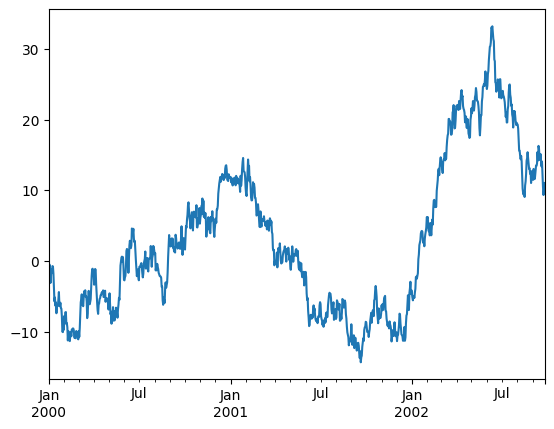

In [32]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts = ts.cumsum()
ts.plot()

<Figure size 640x480 with 0 Axes>

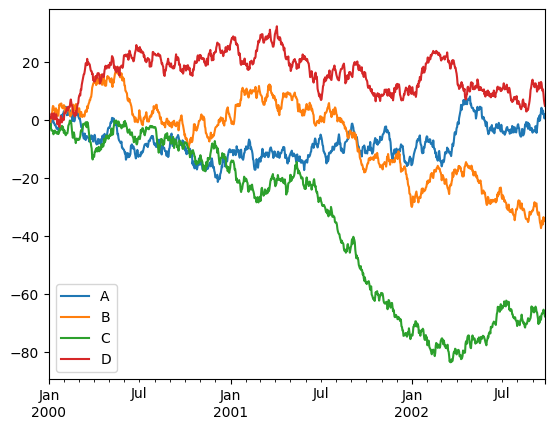

In [34]:
df = pd.DataFrame(np.random.randn(1000,4), index=ts.index, columns=["A","B","C","D"])
df = df.cumsum()
plt.figure()
df.plot()
plt.legend(loc="best")

In [35]:
df.to_csv("foo.csv")
pd.read_csv("foo.csv")

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.284919,0.055434,-1.387557,0.407048
1,2000-01-02,0.998249,-0.418841,-2.317353,0.962695
2,2000-01-03,1.122638,-1.888570,-2.449101,0.893382
3,2000-01-04,-1.063375,-0.517120,-1.338806,0.795265
4,2000-01-05,-1.592024,0.691217,-2.652619,0.672547
...,...,...,...,...,...
995,2002-09-22,3.294017,-35.951560,-66.459697,10.542082
996,2002-09-23,1.912725,-33.469932,-65.368381,8.914962
997,2002-09-24,2.073582,-34.913573,-65.982241,6.866193
998,2002-09-25,0.545923,-34.644976,-66.783528,5.692491


In [36]:
df.to_hdf("foo.h5", "df")
pd.read_hdf("foo.h5", "df")

<ipython-input-36-196c5bd69001>:1: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  df.to_hdf("foo.h5", "df")


,A,B,C,D
2000-01-01,-0.284919,0.055434,-1.387557,0.407048
2000-01-02,0.998249,-0.418841,-2.317353,0.962695
2000-01-03,1.122638,-1.888570,-2.449101,0.893382
2000-01-04,-1.063375,-0.517120,-1.338806,0.795265
2000-01-05,-1.592024,0.691217,-2.652619,0.672547
...,...,...,...,...
2002-09-22,3.294017,-35.951560,-66.459697,10.542082
2002-09-23,1.912725,-33.469932,-65.368381,8.914962
2002-09-24,2.073582,-34.913573,-65.982241,6.866193
2002-09-25,0.545923,-34.644976,-66.783528,5.692491


In [38]:
df.to_excel("foo.xlsx", sheet_name="Sheet1")
pd.read_excel("foo.xlsx", "Sheet1", index_col=None, na_values=["NA"])

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.284919,0.055434,-1.387557,0.407048
1,2000-01-02,0.998249,-0.418841,-2.317353,0.962695
2,2000-01-03,1.122638,-1.888570,-2.449101,0.893382
3,2000-01-04,-1.063375,-0.517120,-1.338806,0.795265
4,2000-01-05,-1.592024,0.691217,-2.652619,0.672547
...,...,...,...,...,...
995,2002-09-22,3.294017,-35.951560,-66.459697,10.542082
996,2002-09-23,1.912725,-33.469932,-65.368381,8.914962
997,2002-09-24,2.073582,-34.913573,-65.982241,6.866193
998,2002-09-25,0.545923,-34.644976,-66.783528,5.692491


In [39]:
s= pd.Series(np.random.randn(5), index=["a","b","c","d","e"])
s

,0
a,-0.067232
b,-0.065903
c,-0.291291
d,-1.302011
e,-0.624946


In [40]:
d = {"b":1,"a":0,"c":2}
pd.Series(d)

,0
b,1
a,0
c,2


In [41]:
pd.Series(d, index=["b","c","d","a"])

,0
b,1.0
c,2.0
d,NaN
a,0.0


In [42]:
pd.Series(5., index=["a","b","c","d","e"])

,0
a,5.0
b,5.0
c,5.0
d,5.0
e,5.0


In [43]:
s[0]

<ipython-input-43-c9c96910e542>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  s[0]


np.float64(-0.06723237900440483)

In [44]:
s[:3]

,0
a,-0.067232
b,-0.065903
c,-0.291291


In [45]:
s[s>s.median()]

,0
a,-0.067232
b,-0.065903


In [46]:
s[[4,3,1]]

<ipython-input-46-8fa15a5a4312>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  s[[4,3,1]]


,0
e,-0.624946
d,-1.302011
b,-0.065903


In [47]:
np.exp(s)


,0
a,0.934978
b,0.936222
c,0.747298
d,0.271984
e,0.535291


In [48]:
s.array

<NumpyExtensionArray>
[np.float64(-0.06723237900440483), np.float64(-0.06590268020722741),
 np.float64(-0.29129126655460025),  np.float64(-1.3020106117296928),
  np.float64(-0.6249456806576942)]
Length: 5, dtype: float64

In [49]:
s.to_numpy()

array([-0.06723238, -0.06590268, -0.29129127, -1.30201061, -0.62494568])

In [50]:
s["a"]

np.float64(-0.06723237900440483)

In [51]:
s["e"]

np.float64(-0.6249456806576942)

In [52]:
np.exp(s)

,0
a,0.934978
b,0.936222
c,0.747298
d,0.271984
e,0.535291


In [53]:
s[1:] + s[:-1]

,0
a,NaN
b,-0.131805
c,-0.582583
d,-2.604021
e,NaN


In [54]:
s= pd.Series(np.random.randn(5),name = "somtheing")

In [55]:
s


,somtheing
0,0.501264
1,1.311144
2,-0.977234
3,-1.580551
4,-1.513851


In [56]:
s2 = s.rename("different")
s2.name

'different'

In [57]:
d = {
    "one": pd.Series([1.0,2.0,3.0],index=["a","b","c"])
    ,"two": pd.Series([1.0,2.0,3.0,4.0],index=["a","b","c","d"])
}
df = pd.DataFrame(d)
df




,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [58]:
pd.DataFrame(d, index=["d","b","a"])

,one,two
d,NaN,4.0
b,2.0,2.0
a,1.0,1.0


In [59]:
pd.DataFrame(d, index=["d","b","a"], columns=["two","three"])

,two,three
d,4.0,NaN
b,2.0,NaN
a,1.0,NaN


In [60]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [61]:
df.columns

Index(['one', 'two'], dtype='object')